# Palmer Penguins

This notebook contains my analysis of the famous Palmer Penguins dataset. 

![Penguins](https://allisonhorst.github.io/palmerpenguins/logo.png)

The dataset is available [on github](https://allisonhorst.github.io/palmerpenguins/).




## Background

***

Penguins are birds in the family Spheniscidae in the monotypic order Sphenisciformes. They inhabit high-productivity marine habitats, almost exclusively in the Southern Hemisphere; the only species to occur north of the Equator is the Galapagos penguin. The only group of birds other than the ratites to be entirely flightless, penguins are extremely adapted to their aquatic lifestyle, with a streamlined shape that minimizes drag, countershaded dark-and-white plumage, dense bones, powerful flippers, and insulating feathers that allow them to withstand very low temperatures on land and in water.

There are currently 18 extant species of penguins recognised by the International Ornithologists' Union, distributed among six genera. (https://en.wikipedia.org/wiki/Penguin)

For the purposes of this notebook I will concentrate on the penguins in the Famous Palmer Penguins Data set.The data was collected as part of research to study Antarctic penguins’ foraging behavior and its relationship with environmental variability. The canonical paper from Gorman et al. presents the research in detail.this data set represents the Antartic penguins.

## Imports 

***

We use pandas for the DataFrame data structure.

It allows us to investigate CSCV files, amongst other features.

In [3]:
# Data frames.
import pandas as pd

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible. (https://matplotlib.org/)This will be used later in the notebook to find a correlation between two variables

In [4]:
# Import the plotting library.
import matplotlib.pyplot as plt

NumPy can be used to perform a wide variety of mathematical operations on arrays.
It adds powerful data structures to Python that guarantee efficient calculations with arraysand matrices and it supplies an enormous library of high-level mathematical functions that operate on these arrays and matrices. (https://numpy.org/doc/stable/user/absolute_beginners.html)

In [5]:
# Import Numpy
import numpy as np

Seaborn is a Python data visualization library based on matplotlib. 
It provides a high-level interface for drawing attractive and informative statistical graphics.
Histplot is part of the seaborn package and this will enable me to do my histogram analysis later in the notbook. 

In [6]:
# import seaborn and histplot
import seaborn as sb
from seaborn import histplot

In [7]:
# ignoring a warning regarding a change in the figure layout
import warnings
warnings.filterwarnings('ignore')

## Load Data

***

Load the Palmer Penguins dataset from a URL.


In [8]:
# load the penguins data set.
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")


The data is now loaded and we can inspect it. 

In [9]:
# Let's have a look.
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


This dataset has 344 rows and total 7 columns:

 - species: penguin species (Chinstrap, Adélie, or Gentoo)
 - culmen_length_mm: culmen length (mm)
 - culmen_depth_mm: culmen depth (mm)
 - flipper_length_mm: flipper length (mm)
 - body_mass_g: body mass (g)
 - island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
 - sex: penguin sex


## Inspect data.

***

In [10]:
# Look at the first row. 
df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

In [11]:
# sex of Penguins
df['sex']

0        MALE
1      FEMALE
2      FEMALE
3         NaN
4      FEMALE
        ...  
339       NaN
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 344, dtype: object

In [12]:
# Count the number of Penguins of each sex.
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [13]:
# count the number of penguins in each species.
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [14]:
# Describe the data set.
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## Tables

***

|Species    |Bill Lenght (mm)  |Body Mass (gms)  |
|---------- |-----------------:| ---------------:|
|Adelie     |              38.8|             3701|
|Chinstrap  |              48.8|             3733|
|Gentoo     |              47.5|             5076|

## Types of variables that could be used to model the variables in the data set. 

***

The Palmer Penguin data set is a popular dataset in the field of data science and can be used for various types of analysis. This the basis for this jupiter notebook. A variable is any kind of attribute or characteristic that can be measured, manipulated and controled in statistics and research. All studies analyze a variable, which can describe a person (in this case penguins), place, thing or idea. A variable's value can change between groups or over time. There are two major types of variables- Quantitave and qualitative. Quantitative variables are data sets that involve numbers or amounts whereas qualitative variables are non-numerical values or groupings. In the case of the Palmer penguin set and example of a qualitiative variable would be mass. An example of a qualitative variable would be species. 

Some common types of variables that could be used to analyze the Palmer Penguin data set include:

1. **Categorical Variables**: 
In statistics, a categorical variable (also called qualitative variable) is a variable that can take on one of a limited, and usually fixed, number of possible values, assigning each individual or other unit of observation to a particular group or nominal category on the basis of some qualitative property.[1]

   - Species: There are three different species of penguins in the dataset - Adelie, Chinstrap, and Gentoo.
   - Island: The penguins were observed on three different islands - Biscoe, Dream, and Torgersen.

   A suggetion for analysis within this category could be if penguins of the same species were living in different environmnets ie islands had differences in their body mass or flipper length. Also the characteristics of each species of penguin can be compared against each other.

2. **Numerical Variables**:
Numeric variables have values that describe a measurable quantity as a number, like 'how many' or 'how much'. Therefore numeric variables are quantitative variables. Numeric variables may be further described as either continuous or discrete: A continuous variable is a numeric variable.[2]

   - Numerical Measurements: Various measurements such as bill length, bill depth, flipper length, and body mass can be used as numerical variables for analysis.
   - Date: The date on which the observations were made can also be a numerical variable for time series analysis.
   
   A suggestion for analysis could be comparing body mass at different times of the year ie date to see if there would be a seasonal aspect to body mass and investigate any trends related to seasonal patterns. By analysisng the body composition ie mass, flipper length ect the patterns or relationships (if any) could be identified

3. **Ordinal Variables**:
Ordinal data is a categorical, statistical data type where the variables have natural, ordered categories and the distances between the categories are not known.[3]

   - Clutch Completion: This variable indicates whether the penguin completed its clutch or not, and can be considered an ordinal variable.
   - Stage: The developmental stage of the penguin (Adult, Chick, or Juvenile) can also be treated as an ordinal variable.
   
   By analysing the completion of the clutch, success in reproduction can be assessed. If compared over years an upward, downward or stagnent trend could be identified. This would be useful to identify potential issues with survival of the species. 


4. **Boolean Variables**:
Boolean data type is a form of data with only two possible values (usually "true" and "false") or in this case Male or Female. [4]

   - Sex: The sex of the penguin (Male or Female) can be represented as a boolean variable.
   
   Many different variables can be assessed using sex. Males can be analysed in comparison to females in relation to mass and body composition.  


5. **Derived Variables**:
A derived variable is one that is derived from two (or more) primary variables. Percentages, ratios, indices and rates are all derived variables. Typically they will be decimal, integer, or alphanumeric types[5]

   - Body Mass Index (BMI): Calculated based on the body mass and flipper length, this can be a derived variable for further analysis.
   - Body Proportions: Ratios of different body measurements can be derived and used for analysis.

   By assessing the BMI or mass of the penguin additional insights into the overall health or body condition can be provided.

6. **Geospatial Variables**:
Geospatial data is information that describes objects, events or other features with a location on or near the surface of the earth. Geospatial data typically combines location information (usually coordinates on the earth) and attribute information (the characteristics of the object, event or phenomena concerned) with temporal information (the time or life span at which the location and attributes exist).[6]

   - Latitude and Longitude: The geographic coordinates of the islands where the penguins were observed can be used as geospatial variables to study any spatial patterns or distribution of penguin populations.

7. **Temporal Variables**:

   - Time of Day: The time of day when observations were made can be used as a temporal variable to investigate any diurnal patterns in penguin behavior or activity levels.

These are just a few examples of the types of variables that could be used to analyze the Palmer Penguin data set. The choice of variables would depend on the specific research questions or analysis objectives that researchers have in mind. The question/answers being sought dictate the type of variables used and how they are represented

## References:

***
1. (Wikipedia).  Yates, Daniel S.; Moore, David S.; Starnes, Daren S. (2003). The Practice of Statistics (2nd ed.). New York: Freeman. ISBN 978-0-7167-4773-4. Archived from the original on 2005-02-09.
2. https://www.abs.gov.au/statistics/understanding-statistics/statistical-terms-and-concepts/variables#:~:text=Numeric%20variables%20have%20values%20that,variable%20is%20a%20numeric%20variable.
3. (Wikipedia).  Agresti, Alan (2013). Categorical Data Analysis (3 ed.). Hoboken, New Jersey: John Wiley & Sons. ISBN 978-0-470-46363-5.
4. https://en.wikipedia.org/wiki/Boolean
5. https://sites.google.com/view/ochrewiki/categories/taxonomy/derived-variables
6. https://www.ibm.com/topics/geospatial-data


## Bar chart of an appropriate variable 

***
The variables that are being assessed in this bar chart are the number of each species of penguin ie the numbers of  Adélie (152 penguins), Gentoo (124 penguins), and Chinstrap (68 penguins) within the data set. 


Text(0, 0.5, 'Number of Penguins')

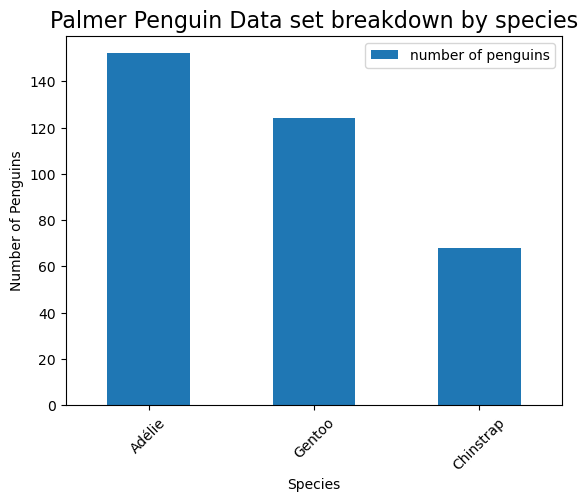

In [15]:
# plot the bar chart.

plotdata = pd.DataFrame(
    {"number of penguins": [152, 124, 68]}, 
    index=["Adélie", "Gentoo", "Chinstrap"])
# Plot a bar chart
plotdata.plot(kind="bar")

plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Palmer Penguin Data set breakdown by species", size=16)
plt.xlabel("Species")
plt.ylabel("Number of Penguins")


Equally the same information could also be represented as a percentage in a pie chart

([<matplotlib.patches.Wedge at 0x2b11c834ed0>,
 [Text(0.21796421346719308, 1.1800388136191233, 'Adelie'),
  Text(-0.7918938277833127, -0.7634816078457249, 'Gentoo'),
  Text(0.894618705053837, -0.6400448207491378, 'Chinstrap')],
 [Text(0.12714579118919594, 0.6883559746111552, '44.2%'),
  Text(-0.4319420878818069, -0.4164445133703954, '36.0%'),
  Text(0.4879738391202747, -0.34911535677225697, '19.8%')])

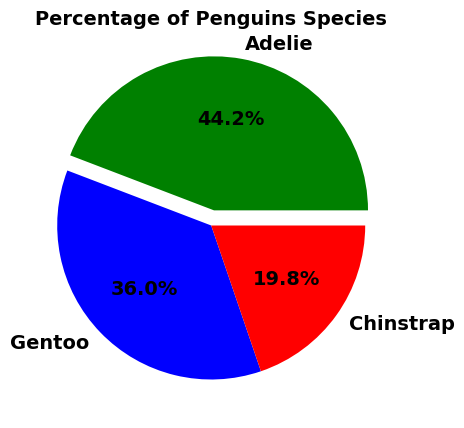

In [16]:
# Set a size of figure
plt.figure(figsize=(12,5))

# Create a figure with multiple subplots.
plt.subplot(1,2,1)

# Set a title of plot
plt.title("Percentage of Penguins Species",fontweight="black",size=14)

species = df["species"].value_counts()

# Pie chart
plt.pie(species.values, labels=species.index, autopct="%.1f%%", textprops={"fontweight":"black","size":14}
     ,explode=(0.1, 0, 0), colors=['green', 'blue', 'red'])

## Observation

***
There are approx twice as many Adelie as Chinstrap penguins.

## Histogram of an appropriate variable.

***

I chose to do a histogram on the mass of the penguins. 

In [17]:
# plot the histogram

def histplot(column):
    plt.figure(figsize=(10,4))
    sb.histplot(x= column, kde=True, data=df, hue='species', palette='pastel')
    plt.title(f"{column.title()}",fontweight="black",size=18)
    plt.show()


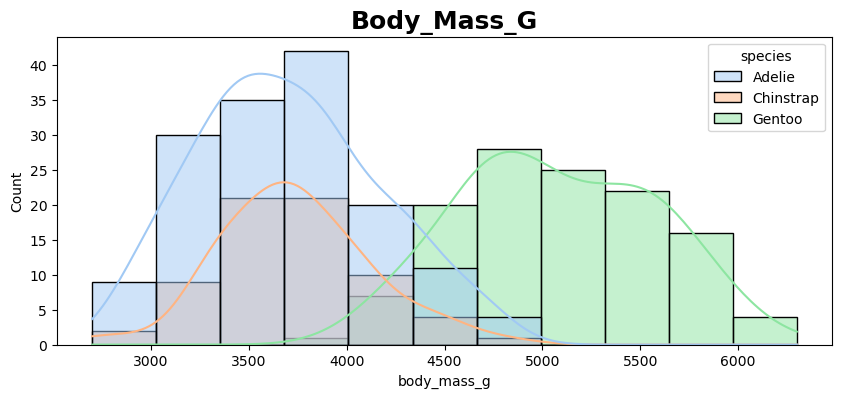

In [18]:
histplot('body_mass_g')

## Observation

***
As a species the Gentoo penguins are a bigger species in relation to mass as they are mostly between 4500g and 6000g.
The smallest species from a mass perspective is Adeline as they weigh mostly between 3000g and 4000g

## The differences between a Histogram and a Bar graph. An important distinction.

***
Although histograms and bar charts use a column-based display, they serve different purposes.

A bar graph is used to compare discrete or categorical variables in a graphical format whereas a histogram depicts the frequency distribution of variables in a dataset ie Histograms visualize quantitative data or numerical data, whereas bar charts display categorical variables. This is why I chose to look at the differing number of species within in the data set as a bar chart and I choose to look at  

## A correlation of two variables

***



Text(0.5, 1.0, 'Comparing bill depth by species and sex')

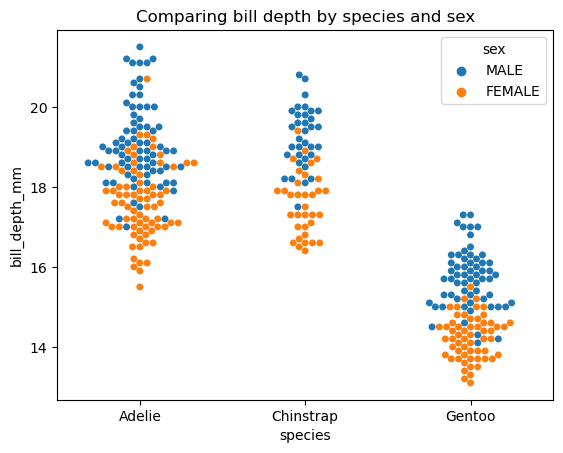

In [26]:
from doctest import master


sb.swarmplot(data = df, x = 'species', y = 'bill_depth_mm', hue = 'sex', palette = master)
plt.title("Comparing bill depth by species and sex")

 - This swarm plot states that overall 'Gentoo' penguins have the smallest bill depth with females being   smaller than the males.
  - The 'Adelie' and 'Chinstrap' have similar bill depth but it is worth noting that the population size of the 'chinstrap' is much smaller than the 'Adelie'. We could rely on this data if population sizes were closer to equal. 

Text(0.5, 1.0, 'Comparing flipper length by species and island')

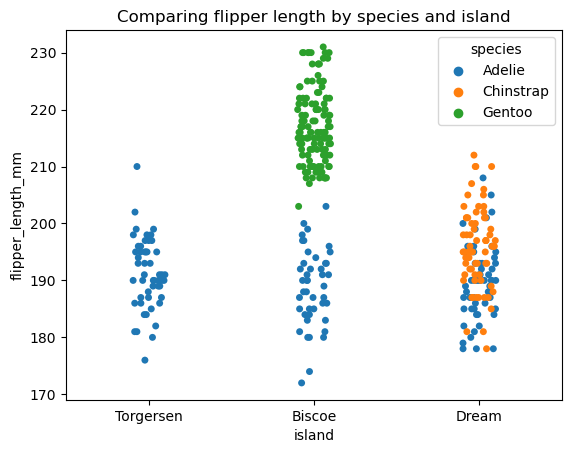

In [29]:
sb.stripplot(data = df, y = 'flipper_length_mm', x = 'island', hue = 'species', palette = master)
plt.title("Comparing flipper length by species and island")

 - The Gentoo penguins have longer flipper lengths compared to the other two species. 
 - Chintrap has a slightly longer flipper length than Adelie.

Text(0.5, 1.0, 'Body Mass in g by Species and Sex')

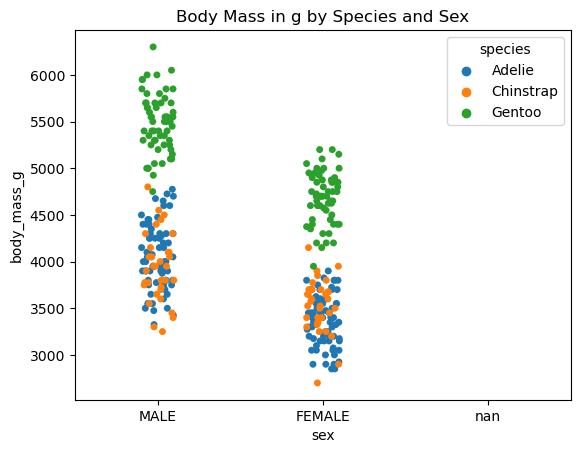

In [34]:
sb.stripplot(data = df, y = 'body_mass_g', x = 'sex', hue = 'species', palette = master)
plt.title("Body Mass in g by Species and Sex")

 - 'Gentoo' penguins have the highest mass irrespective of gender.
 - 'Chinstrap' and 'Adeline' would be approximately the same mass when comparing males or comparing females.
 - The females have a smaller mass than the males. This can be further analysed byn the following:

In [31]:
df.groupby(['species','sex'])["body_mass_g"].std()

species    sex   
Adelie     FEMALE    269.380102
           MALE      346.811553
Chinstrap  FEMALE    285.333912
           MALE      362.137550
Gentoo     FEMALE    281.578294
           MALE      313.158596
Name: body_mass_g, dtype: float64

## Conclusion

***
 - Adelie - Are found on all three islands, have they have the shorted bill_length and are very similar to Chinstrap penguins on all the other factors..

 - Chinstrap - Are only found on the Dream island, their bill length is similar to Gentoo penguins, while their bill depth is similar to Adelie penguins.

 - Gentoo - Are only found on the Biscoe island, they have smaller bill depths but the largest flipper length and weight more than the other two penguin species.

 - Variables for male penguins in all species is higher than that for female penguins. As with all nature there are outliers.
 


***

### End